# Basic comparisons

In this notebook look at plotting the positions of different telescopes changes from 2012 to 2019 

In [46]:
from scripts import * 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [38]:
# load in all the data, clean it, and find the model parameters 
design_mat_04_07, pinv_04_07, y_04_07, beta_04_07 = load_and_clean('2019_04_07')
design_mat_04_08, pinv_04_08, y_04_08, beta_04_08 = load_and_clean('2019_04_08')
design_mat_11_05, pinv_11_05, y_11_05, beta_11_05 = load_and_clean('2019_11_05')
design_mat_11_06, pinv_11_06, y_11_06, beta_11_06 = load_and_clean('2019_11_06')

sigma_04_07 = svd_uncertainty(design_mat_04_07, y_04_07, beta_04_07)[:15].reshape(5,3)
sigma_04_08 = svd_uncertainty(design_mat_04_08, y_04_08, beta_04_08)[:15].reshape(5,3)
sigma_11_05 = svd_uncertainty(design_mat_11_05, y_11_05, beta_11_05)[:15].reshape(5,3)
sigma_11_06 = svd_uncertainty(design_mat_11_06, y_11_06, beta_11_06)[:15].reshape(5,3)

beta_04_07 = beta_04_07[:15].reshape(5,3)
beta_04_08 = beta_04_08[:15].reshape(5,3)
beta_11_05 = beta_11_05[:15].reshape(5,3)
beta_11_06 = beta_11_06[:15].reshape(5,3)

# 2019 Apr-Nov

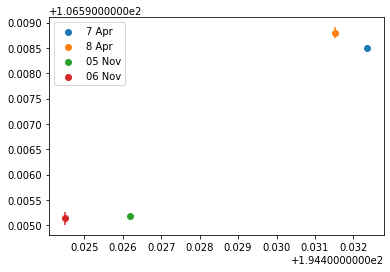

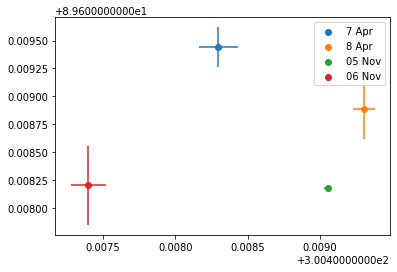

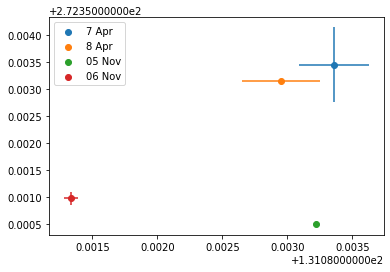

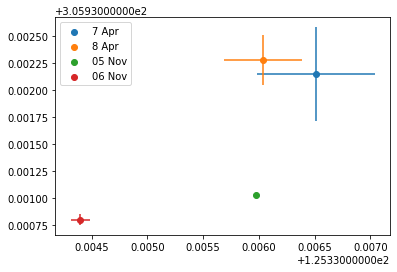

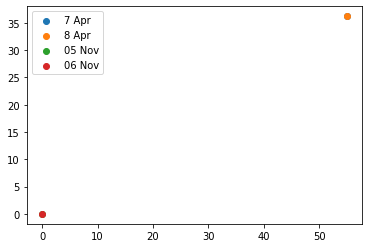

In [43]:
# for each telescope (wrt E1) it is probably easiest visualise (x, y) and (z) locations

for i in range(5):

    plt.scatter(beta_04_07[i,0], beta_04_07[i,1], label='7 Apr')
    plt.scatter(beta_04_08[i,0], beta_04_08[i,1], label='8 Apr')
    plt.scatter(beta_11_05[i,0], beta_11_05[i,1], label='05 Nov')
    plt.scatter(beta_11_06[i,0], beta_11_06[i,1], label='06 Nov')

    plt.errorbar(beta_04_07[i,0], beta_04_07[i,1], xerr=sigma_04_07[i,0], yerr=sigma_04_07[i,1])
    plt.errorbar(beta_04_08[i,0], beta_04_08[i,1], xerr=sigma_04_08[i,0], yerr=sigma_04_08[i,1])
    plt.errorbar(beta_11_05[i,0], beta_11_05[i,1], xerr=sigma_11_05[i,0], yerr=sigma_11_05[i,1])
    plt.errorbar(beta_11_06[i,0], beta_11_06[i,1], xerr=sigma_11_06[i,0], yerr=sigma_11_06[i,1])
    plt.legend()
    plt.show()

In [ ]:
for i in range(5):

    plt.scatter(beta_04_07[i,2], label='7 Apr')
    plt.scatter(beta_04_08[i,2], label='8 Apr')
    plt.scatter(beta_11_05[i,2], label='05 Nov')
    plt.scatter(beta_11_06[i,2], label='06 Nov')

    plt.errorbar(beta_04_07[i,2], yerr=sigma_04_07[i,1])
    plt.errorbar(beta_04_08[i,2], yerr=sigma_04_08[i,1])
    plt.errorbar(beta_11_05[i,2], yerr=sigma_11_05[i,1])
    plt.errorbar(beta_11_06[i,2], yerr=sigma_11_06[i,1])
    plt.legend()
    plt.show()

# 2012 

Since the 2012 data set can be much more sparse, need to check for degeneracies etc. 

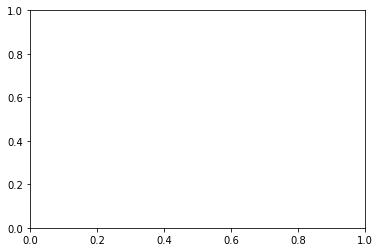

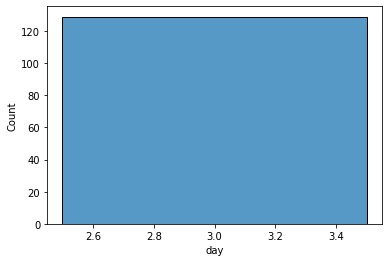

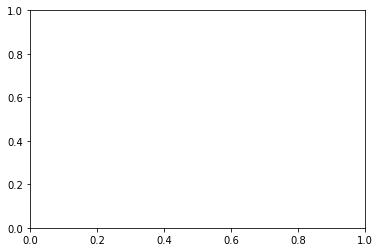

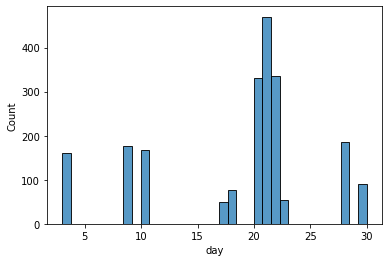

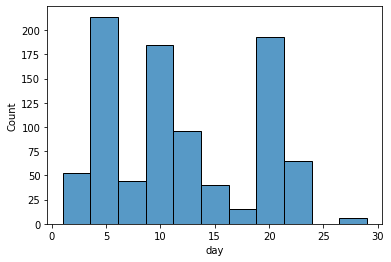

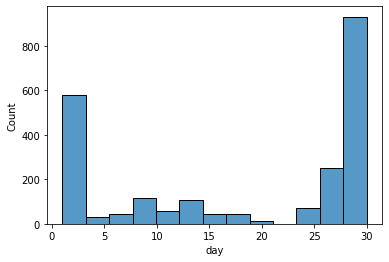

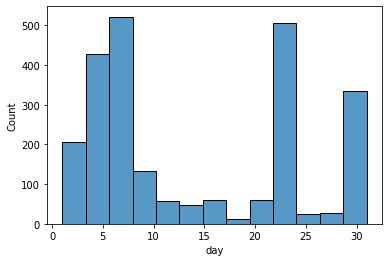

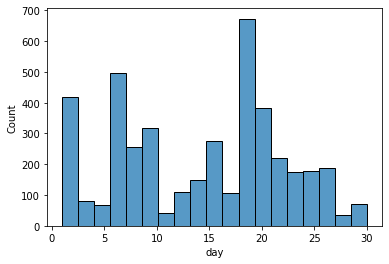

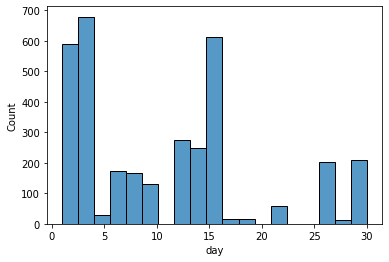

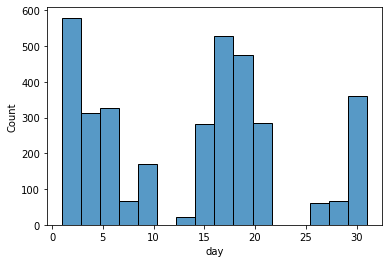

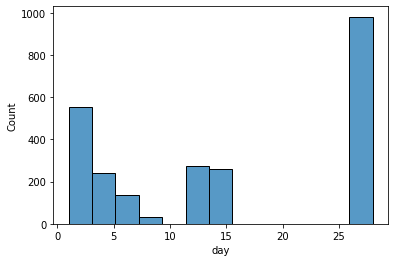

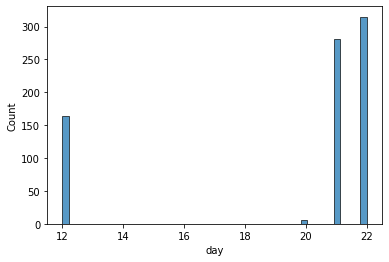

In [47]:
# first see what days have nice amounts of data

df_2012 = pd.read_csv('data/2012_all_v2.csv')

for month in range(1,13):
    sns.histplot(df_2012[df_2012.month==month].day)
    plt.show()

In [ ]:
# first it may be worth comparing Apr and Nov in 2012 and 2019 
# also divide into subset of two months 

# also know that the constant term varys on the level on 100s microns each night 
# but we say that pop settings are constant